gamma=0.0274938 beta=0.0807609 R0=2.93743


Text(0.5, 1.0, 'tmax=139.7, Imax=29.3% Total infected: 93.6%')

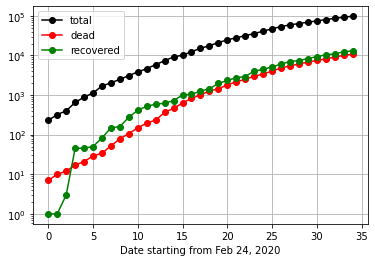

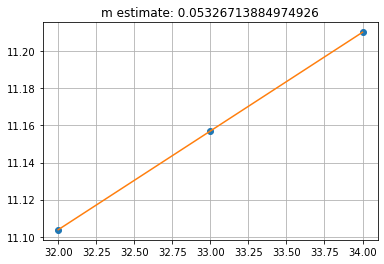

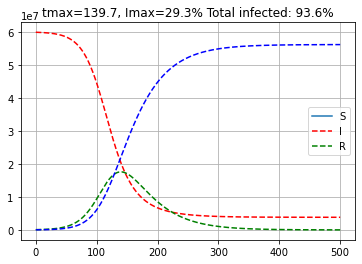

In [1]:
#%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Italy total virus cases the first point is on Feb 24. Last point is for March 29.  
total=[229, 322, 400, 650, 888, 1128, 1694, 2036, 2502, 3089, 3858, 4636, 5883, 7375, 9172, 10149, 12462, 15113, 17660, 21157, 24747, 27980, 31506, 35713, 41035, 47021, 53578, 59138, 63927, 69176, 74386, 80539, 86498, 92472, 97689];
death=[7, 10, 12, 17, 21, 29, 34, 52, 79, 107, 148, 197, 233, 366, 463, 631, 827, 1016, 1266, 1441, 1809, 2158, 2503, 2978, 3405, 4032, 4825, 5476, 6077, 6820, 7503, 8165, 9134, 10023, 10779]
recovered=[1, 1, 3, 45, 46, 50, 83, 149, 160, 276, 414, 523, 589, 622, 724, 1004, 1045, 1258, 1439, 1966, 2335, 2749, 2941, 4025, 4440, 5129, 6072, 7024, 7432, 8326, 9362, 10361, 10950, 12384, 13030]

# =============================================================================
# url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
# all = pd.read_csv(url)
# 
# total=list(all['totale_casi'])
# death=list(all['deceduti'])
# recovered=list(all['dimessi_guariti'])
# 
# =============================================================================


R=[x + y for x, y in zip(death, recovered)] # R here also includes the dead
I=[x - y for x, y in zip(total, R)]

plt.figure();
plt.plot(total, 'o-k'); 
plt.plot(death, 'o-r'); 
plt.plot(recovered, 'o-g'); 
plt.legend(['total', 'dead', 'recovered'])
plt.grid(1);
plt.yscale('log')
plt.xlabel('Date starting from Feb 24, 2020')
plt.figure();

en=len(total); st=en-3;
#st=0; en=st+10;
y=np.log(I[st:en])

t=np.array(range(st, en))

m, b = np.polyfit(t, y, 1)
plt.plot(t, (y), 'o')
plt.plot(t, (m*t + b))
plt.title('m estimate: %s' % m)
plt.grid()

#%%
plt.figure()


g=[]
for i in range(st, en-1):
    oo=(R[i+1]-R[i])/I[i]
    g.append(oo)

plt.plot(g)    
plt.grid(1)
gamma= np.mean(g);
plt.title('gamma estimate: %s' % gamma)
#%%
gamma
beta=m+gamma
print('gamma=%g beta=%g R0=%g' %(gamma, beta, beta/gamma))


#%%


#m=0.3416
def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0;
    S=S0; R=R0; I=I0;
    SS=[S0];RR=[R0]; II=[I0];
    tt=[t0];
    dt=0.1;
    t=t0
    while t <= t1:
        dS=-beta*S*I/N
        dI=beta*S*I/N-gamma*I
        dR=gamma*I
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(6e7,  I[en-1], R[en-1], 0, 500, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 
#plt.plot(SIRT[3], (SIRT[0]), '--k')
plt.plot(tt, SS, '--r')
plt.plot(tt, II, '--g')
plt.plot(tt, RR, '--b')
#plt.plot(SIRT[3], (SIRT[2]), '--g')
#plt.plot(range(st,en), I[st:en], 'or')
plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

